# CIFAR-10 Image Classification with Improved CNN
This notebook implements a Convolutional Neural Network (CNN) for image classification on the CIFAR-10 dataset.
It includes data preprocessing, data augmentation, training with regularization, and evaluation with visualizations.

## 1. Import Required Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 2. Load and Preprocess the CIFAR-10 Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

y_train = y_train.flatten()
y_test = y_test.flatten()

## 3. Define Class Labels

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

## 4. Create a Deeper CNN Model

In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

C:\Users\ramch\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 5. Compile the Model

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 6. Set Up Data Augmentation

In [6]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

## 7. Set Up Early Stopping

In [7]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

## 8. Train the Model

In [12]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# Manually split training set into train and validation sets
x_train_new, x_val, y_train_new, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

# Create generator only for training data
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train_new)

# Define early stopping before training
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model with data augmentation and early stopping
history = model.fit(
    datagen.flow(x_train_new, y_train_new, batch_size=64),
    validation_data=(x_val, y_val),
    epochs=10,  # Reduced epochs
    callbacks=[early_stop],
    steps_per_epoch=x_train_new.shape[0] // 64,
    verbose=2
)


Epoch 1/10
625/625 - 172s - 275ms/step - accuracy: 0.6240 - loss: 1.0737 - val_accuracy: 0.6501 - val_loss: 1.0028
Epoch 2/10
625/625 - 10s - 15ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6501 - val_loss: 1.0028
Epoch 3/10
625/625 - 164s - 263ms/step - accuracy: 0.6650 - loss: 0.9560 - val_accuracy: 0.6923 - val_loss: 0.8758
Epoch 4/10
625/625 - 10s - 16ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6923 - val_loss: 0.8758
Epoch 5/10
625/625 - 192s - 308ms/step - accuracy: 0.6979 - loss: 0.8760 - val_accuracy: 0.6966 - val_loss: 0.9313
Epoch 6/10
625/625 - 11s - 17ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6966 - val_loss: 0.9313
Epoch 7/10
625/625 - 152s - 243ms/step - accuracy: 0.7169 - loss: 0.8190 - val_accuracy: 0.5706 - val_loss: 1.3517
Epoch 8/10
625/625 - 9s - 15ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5706 - val_loss: 1.3517
Epoch 9/10
625/625 - 147s - 236ms/step - accuracy: 0.7325

## 9. Evaluate the Model

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)

313/313 - 7s - 22ms/step - accuracy: 0.7536 - loss: 0.7511
Test accuracy: 0.753600001335144


## 10. Classification Report and Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 121ms/step
Classification Report:
               precision    recall  f1-score   support

    airplane       0.84      0.76      0.79      1000
  automobile       0.94      0.81      0.87      1000
        bird       0.77      0.56      0.65      1000
         cat       0.67      0.43      0.53      1000
        deer       0.65      0.83      0.73      1000
         dog       0.81      0.58      0.67      1000
        frog       0.58      0.94      0.72      1000
       horse       0.91      0.76      0.83      1000
        ship       0.80      0.92      0.86      1000
       truck       0.74      0.94      0.83      1000

    accuracy                           0.75     10000
   macro avg       0.77      0.75      0.75     10000
weighted avg       0.77      0.75      0.75     10000

Confusion Matrix:
 [[757  10  29   5  20   2  22   5  87  63]
 [  5 815   1   1   2   0  13   0  19 144]
 [ 58   2 559  20 116  21 177   9  20  18]
 [ 14   5  56 434  99  81

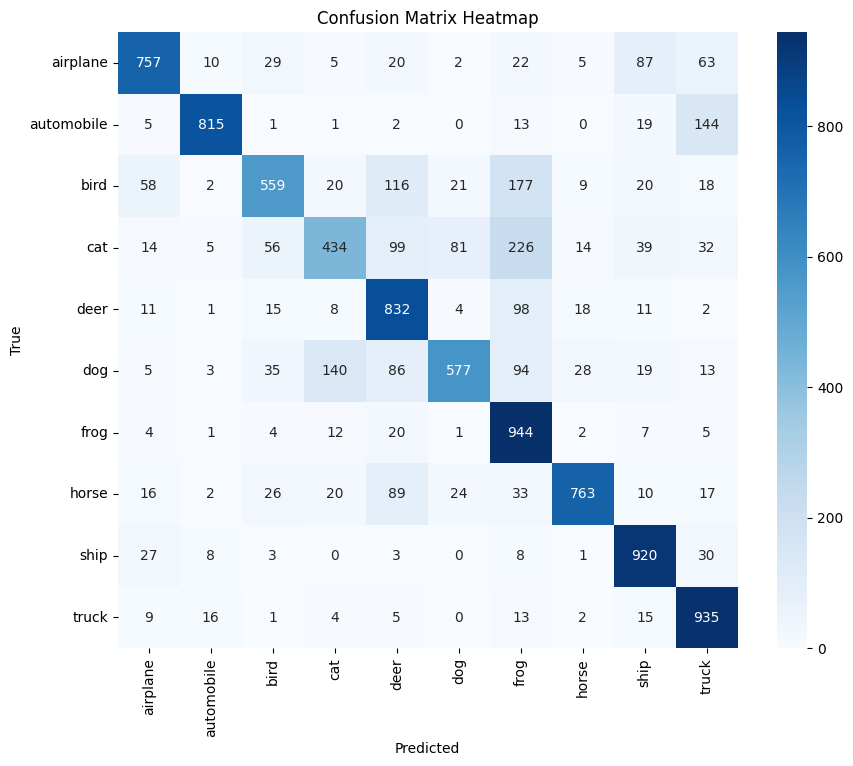

In [14]:
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

report = classification_report(y_test, y_pred, target_names=class_names)
print("Classification Report:\n", report)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

## 11. Accuracy and Loss Graphs

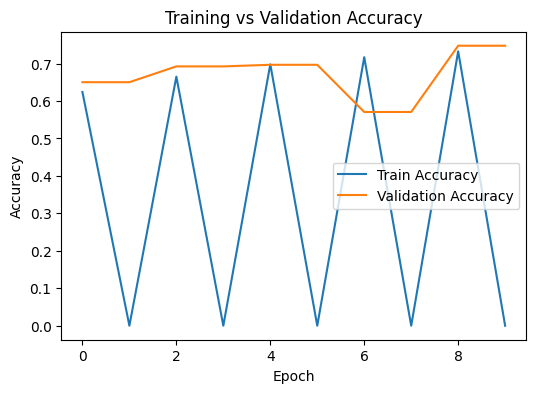

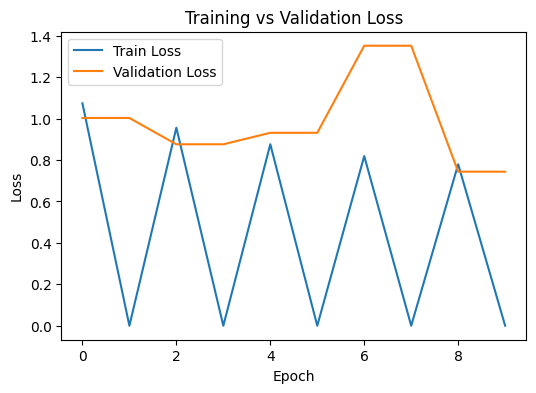

In [15]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

## 12. Show Sample Predictions

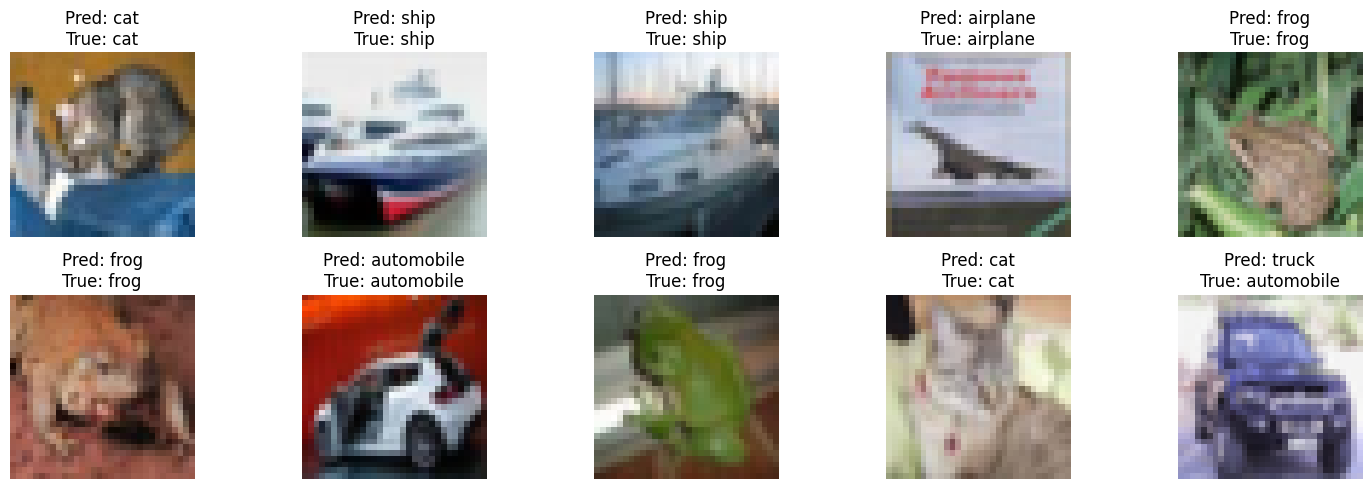

In [16]:
def show_sample_predictions(x_data, y_true, y_pred, class_names, num_samples=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(2, num_samples // 2, i + 1)
        plt.imshow(x_data[i])
        plt.title(f"Pred: {class_names[y_pred[i]]}\nTrue: {class_names[y_true[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_sample_predictions(x_test, y_test, y_pred, class_names)

## 13. Show Misclassified Images

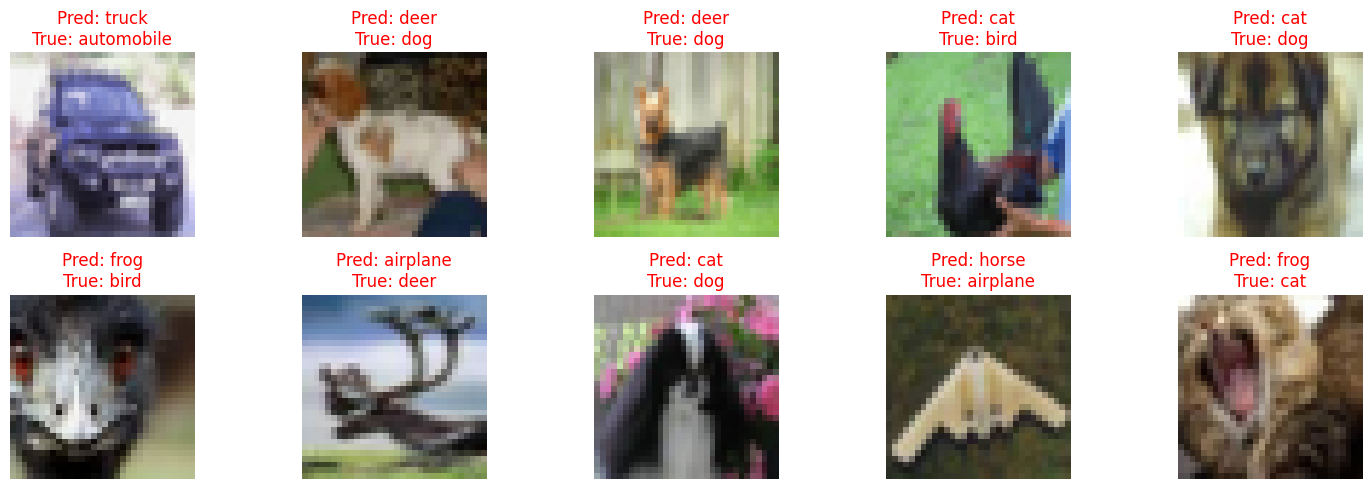

In [17]:
def show_misclassified_images(x_data, y_true, y_pred, class_names, num_images=10):
    misclassified_indices = np.where(y_true != y_pred)[0]
    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(misclassified_indices[:num_images]):
        plt.subplot(2, num_images // 2, i + 1)
        plt.imshow(x_data[idx])
        plt.title(f"Pred: {class_names[y_pred[idx]]}\nTrue: {class_names[y_true[idx]]}", color='red')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_misclassified_images(x_test, y_test, y_pred, class_names)

## 14. Predict a Specific Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


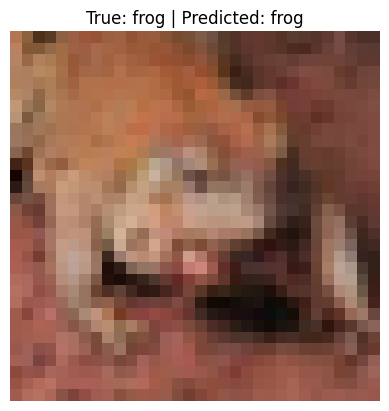

In [18]:
index = 5
img = x_test[index]
true_label = y_test[index]

img_input = np.expand_dims(img, axis=0)
pred_probs = model.predict(img_input)
predicted_label = np.argmax(pred_probs[0])

plt.imshow(img)
plt.title(f"True: {class_names[true_label]} | Predicted: {class_names[predicted_label]}")
plt.axis('off')
plt.show()